# Отбор событий 2018_12_07-08_run2 для анализа 

In [5]:
!date
!pwd
!ls

Чт дек 13 12:06:51 MSK 2018
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/checkTrigger/draw
2  2018.out  draw  levels2018.dat  levels_events.txt


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.gridspec as gridspec

In [3]:
plt.rcParams['figure.figsize'] =(12,6)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

## Чтение данных

In [116]:
# чтение данных экспериментальных триггеров
head=['EID','UTC','Type','Dt','Atotal',
      'TG5time','TL2time','TL3time','TRIGGER','Amax']
data = pd.read_csv('../2018.out', index_col=False, header=None, names=head)
print(len(data))
#data[:3]

5670


In [117]:
# чтение данных экспериментальных триггеров
head=['EID','Fifo_err']
fifo = pd.read_csv('../fifo_err.dat', index_col=False, header=None, names=head, sep='\s+')
print(len(fifo))
n=964
#fifo[n:n+3]

7963


In [118]:
len(fifo)-len(data)

2293

In [119]:
data = pd.merge(data,fifo, how="inner", on='EID')
print(data.shape)
data.head()

(5670, 11)


,EID,UTC,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
0,21510,2018-12-07 21:00:58,L,3,903,243,43,243,43,396,0
1,21511,2018-12-07 21:00:58,E,7,595,240,43,241,43,938,0
2,21512,2018-12-07 21:01:18,L,3,816,242,43,242,43,318,0
3,21513,2018-12-07 21:01:18,L,1,0,241,43,254,43,927,0
4,21514,2018-12-07 21:01:22,L,5,1417,242,43,242,43,455,0


## Свойства данных

In [120]:
data.describe()

,EID,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,25665.358201,3.262257,1055.475309,345.242152,238.640564,310.308289,238.024339,658.144974,2.314109
std,1655.296806,2.520021,13018.840150,115.211591,40.631181,99.709351,40.488939,364.164700,7.529229
min,21510.000000,1.000000,0.000000,68.000000,43.000000,47.000000,43.000000,108.000000,0.000000
25%,24256.250000,2.000000,12.000000,242.000000,241.000000,244.000000,241.000000,178.000000,0.000000
50%,25673.500000,3.000000,39.000000,254.000000,242.000000,255.000000,242.000000,934.500000,0.000000
75%,27090.750000,4.000000,484.750000,472.000000,243.000000,472.000000,243.000000,981.000000,0.000000
max,28788.000000,62.000000,668027.000000,473.000000,472.000000,473.000000,472.000000,998.000000,32.000000


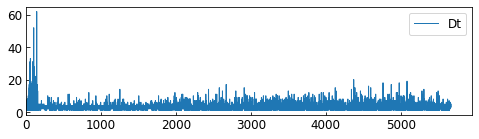

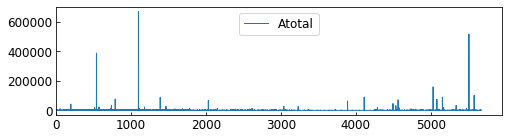

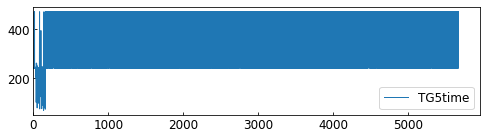

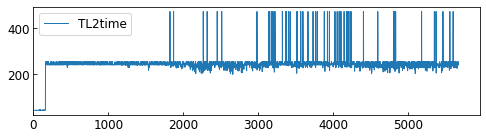

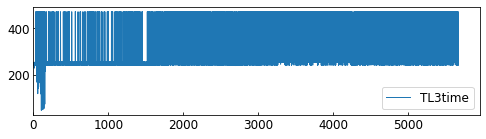

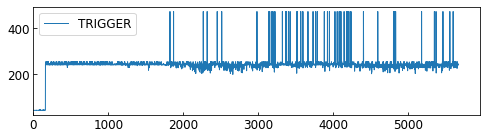

In [121]:
for x in ['Dt','Atotal','TG5time','TL2time','TL3time','TRIGGER']:
    plt.figure(figsize=(8,2))
    plt.plot(data[x],   label = x)
    plt.xlim(0)
    plt.legend()

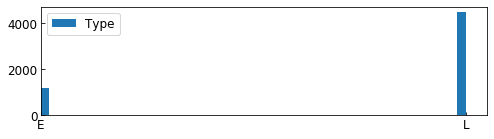

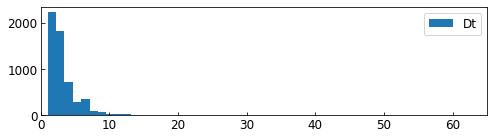

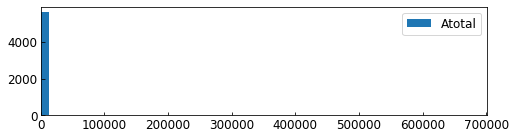

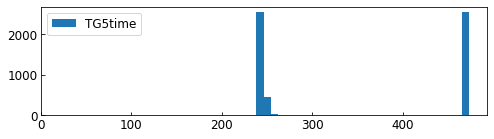

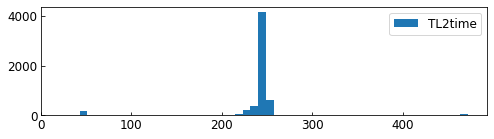

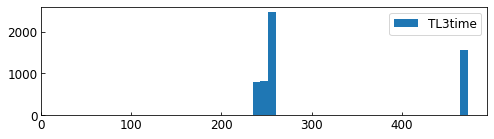

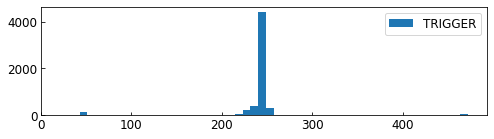

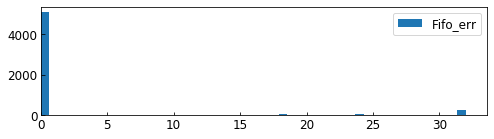

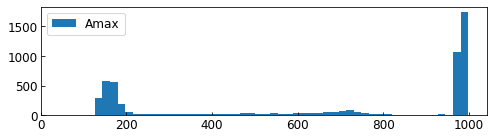

In [122]:
for x in ['Type','Dt','Atotal','TG5time','TL2time','TL3time','TRIGGER','Fifo_err','Amax']:
    plt.figure(figsize=(8,2))
    plt.hist(data[x], 50, label = x)
    plt.xlim(0)
    plt.legend()

In [123]:
data.Dt[data['Fifo_err'] > 2].count()

571

## Отсев

In [154]:
print('All data       :', data.shape[0])
new = data[data.Fifo_err < 3] #
print('Fifo_err <  3  :', new.shape[0])
new = new[new.TL2time < 350]  #
print('TL2time < 350  :', new.shape[0])
new = new[new.TL2time > 220]  #
print('TL2time > 220  :', new.shape[0])
new = new[new.Amax   < 900]
print('Amax   <  900  :', new.shape[0])
new = new[new.Atotal < 100000] #
print('Atotal < 100000:', new.shape[0])
new = new[new.Atotal > 0] #
print('Atotal >    0  :', new.shape[0])
new.describe()

All data       : 5670
Fifo_err <  3  : 5099
TL2time < 350  : 5060
TL2time > 220  : 4882
Amax   <  900  : 2256
Atotal < 100000: 2251
Atotal >    0  : 2143


,EID,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
count,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000,2143.000000
mean,25580.870275,4.167056,1548.576762,453.719085,240.835278,359.219319,240.835278,364.088194,0.004666
std,1630.287151,2.332352,4535.544003,61.982373,4.482087,114.656473,4.482087,240.485129,0.096516
min,23001.000000,1.000000,1.000000,241.000000,221.000000,240.000000,221.000000,121.000000,0.000000
25%,24150.000000,3.000000,263.000000,472.000000,241.000000,243.000000,241.000000,159.000000,0.000000
50%,25433.000000,4.000000,619.000000,472.000000,242.000000,472.000000,242.000000,194.000000,0.000000
75%,27123.000000,5.000000,1825.000000,472.000000,243.000000,472.000000,243.000000,618.500000,0.000000
max,28787.000000,20.000000,88750.000000,473.000000,245.000000,473.000000,245.000000,896.000000,2.000000


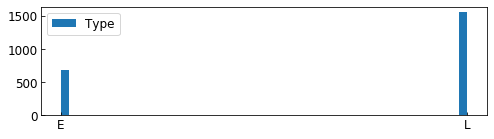

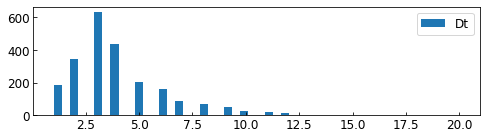

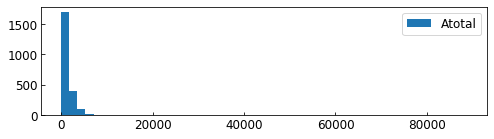

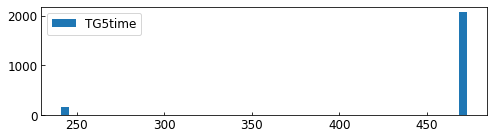

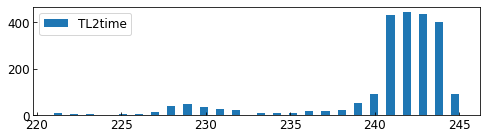

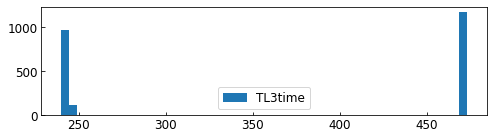

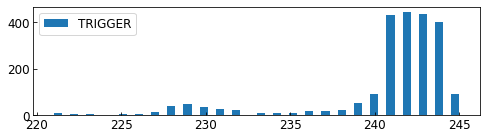

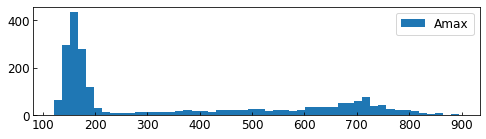

In [150]:
for x in ['Type','Dt','Atotal','TG5time','TL2time','TL3time','TRIGGER','Amax']:
    plt.figure(figsize=(8,2))
    plt.hist(new[x], 50, label = x)
    #plt.yscale('log')
    #plt.xlim(0)
    plt.legend()

In [167]:
nums = list(new.EID[:])

In [160]:
new.to_csv('data_to_analyze.csv')

In [170]:
import csv 

with open("nums.csv", "w", newline='\n') as file:
    csv.writer(file).writerow(nums)

In [171]:
with open("nums.txt", "w") as outfile:
    print(*nums, file=outfile, sep="\n")